In [331]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import ensemble  # pakiet z lasami decyzyjnymi
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection


# Data describtion

In [332]:
wine_red = pd.read_csv('winequality-red.csv')
wine_white = pd.read_csv('winequality-white.csv')

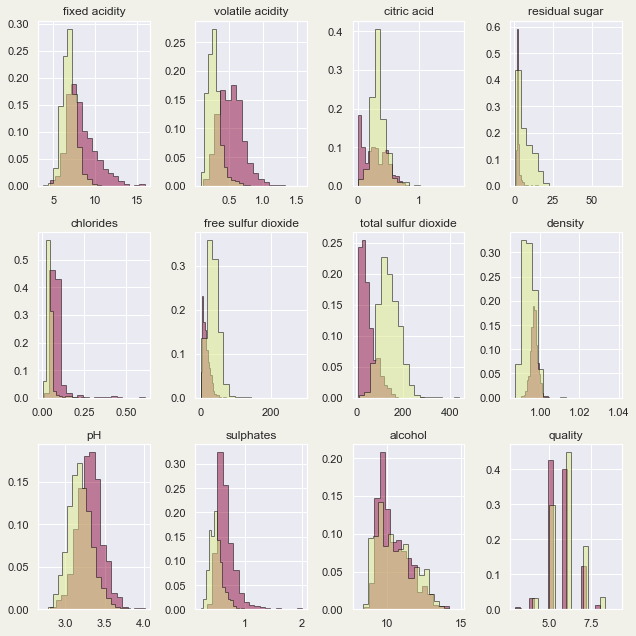

In [333]:
sns.set_style("darkgrid")
sns.set_context("notebook")

fig, axs = plt.subplots(3,4, figsize=(9, 9), facecolor='#F1F0E9', edgecolor='black',tight_layout=True)
fig.subplots_adjust()


axs = axs.ravel()

for i,x in enumerate(wine_red):
    axs[i].hist(wine_red[x],color="#900C3F",bins=18,edgecolor='black',alpha = 0.5,weights=np.ones(len(wine_red[x])) / len(wine_red[x]),histtype="stepfilled")
    axs[i].hist(wine_white[x],color="#DDEB86",bins=18,edgecolor='black',alpha = 0.5,weights=np.ones(len(wine_white[x])) / len(wine_white[x]),histtype="stepfilled")
    axs[i].set_title(x)

In [334]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [335]:
wine_red["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [336]:
def quality_01 (x):
    if x < 6:
        return 0
    elif x < 7:
        return 1
    else:
        return 2
quality_vec = np.vectorize(quality_01)

wine_red["quality"] = wine_red["quality"].apply(quality_vec)
wine_white["quality"] = wine_white["quality"].apply(quality_vec)


In [337]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.881584
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.733030
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,2.000000


In [338]:
print(f"Red wine:\n  Is there any null value? - > {wine_red.isnull().values.any()}\n  Is there any na value? - > {wine_red.isna().values.any()}\nWhite wine:\n  Is there any null value? - > {wine_white.isnull().values.any()}\n  Is there any na value? - > {wine_white.isna().values.any()}")

Red wine:
  Is there any null value? - > False
  Is there any na value? - > False
White wine:
  Is there any null value? - > False
  Is there any na value? - > False


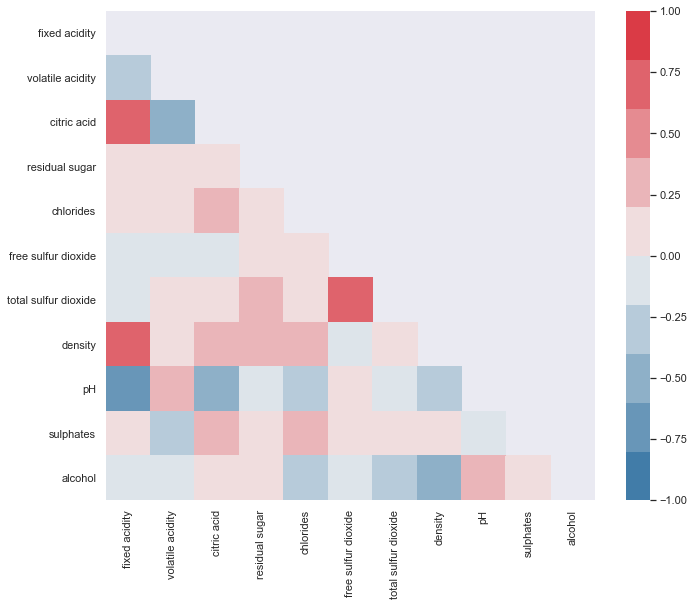

In [339]:
correlation_matrix_red = np.round(wine_red.drop("quality",axis=1).corr(),2)

sns.set(rc={'figure.figsize':(11,9)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(correlation_matrix_red), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(correlation_matrix_red,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

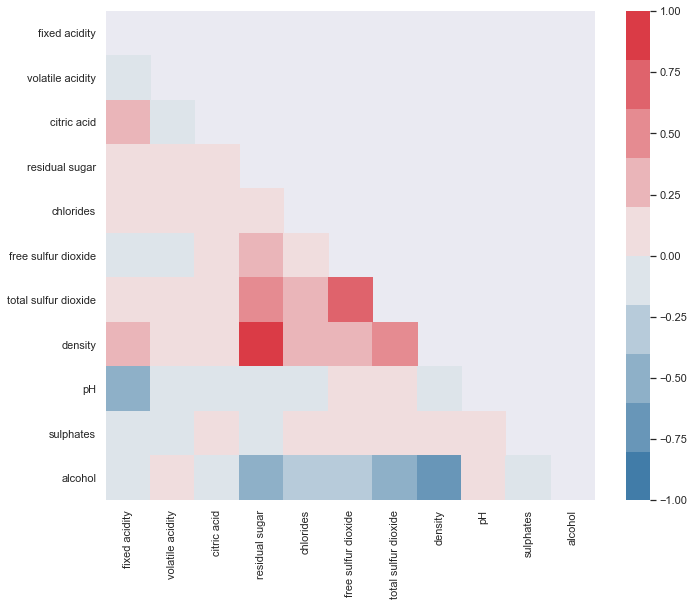

In [340]:
correlation_matrix_white = np.round(wine_white.drop("quality",axis=1).corr(),2)

sns.set(rc={'figure.figsize':(11,9)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(correlation_matrix_white), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(correlation_matrix_white,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

# Modeling

In [341]:
X_red = wine_red.drop("quality",axis=1)
y_red = wine_red["quality"]
X_white = wine_white.drop("quality",axis=1)
y_white = wine_white["quality"]

In [342]:
from sklearn.preprocessing import StandardScaler
X_features = X_red
X_red = StandardScaler().fit_transform(X_red)


train_x_red, test_x_red, train_y_red, test_y_red = model_selection.train_test_split(X_red,y_red,random_state=2021,test_size=0.2)
train_x_white, test_x_white, train_y_white, test_y_white = model_selection.train_test_split(X_white,y_white,random_state=2021,test_size=0.2)

In [343]:
# Red wine Random Forest classifier

rf_classifier_red = ensemble.RandomForestClassifier(
    n_estimators = 100, criterion = 'gini', bootstrap=True,max_depth=7)
rf_classifier_red.fit(train_x_red, train_y_red)
y_pred_red = rf_classifier_red.predict_proba(test_x_red)
# White wine Random Forest classifier

rf_classifier_white = ensemble.RandomForestClassifier(
    n_estimators = 100, criterion = 'gini', bootstrap=True,max_depth=7)
rf_classifier_white.fit(train_x_white, train_y_white)
y_pred_white = rf_classifier_white.predict_proba(test_x_white)


print(f"Random Forest score Test:\n Red wine: {rf_classifier_red.score(test_x_red, test_y_red)}\n White wine: {rf_classifier_white.score(test_x_white, test_y_white)}")
print(f"Random Forest score Train:\n Red wine: {rf_classifier_red.score(train_x_red, train_y_red)}\n White wine: {rf_classifier_white.score(train_x_white, train_y_white)}")

Random Forest score Test:
 Red wine: 0.659375
 White wine: 0.639795918367347
Random Forest score Train:
 Red wine: 0.8584831899921814
 White wine: 0.7225625319040326


In [344]:
def variable_importance (data_one,data_two,model_one,model_two):    
    sns.set_context("talk")
    # RED
    # Get numerical feature importances
    feature_list_one = list(data_one.drop("quality",axis=1))
    importances_one = list(model_one.feature_importances_)
    # List of tuples with variable and importance
    feature_importances_one = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_one, importances_one)]
    # Sort the feature importances by most important first
    feature_importances_one = sorted(feature_importances_one, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 

    # WHITE
    # Get numerical feature importances
    feature_list_two = list(data_two.drop("quality",axis=1))
    importances_two = list(model_two.feature_importances_)
    # List of tuples with variable and importance
    feature_importances_two = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_two, importances_two)]
    # Sort the feature importances by most important first
    feature_importances_two = sorted(feature_importances_two, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 


    # list of x locations for plotting
    x_values = list(range(len(importances)))
    # Make a bar chart

    fig, axs = plt.subplots(2)
    fig.suptitle('Wine feature importances')
    axs[0].barh(feature_list_one, importances_one,color="#900C3F",edgecolor="black",linewidth=1.2)
    axs[1].barh(feature_list_two, importances_two,color="#DDEB86",edgecolor="black",linewidth=1.2)
    plt.tight_layout()


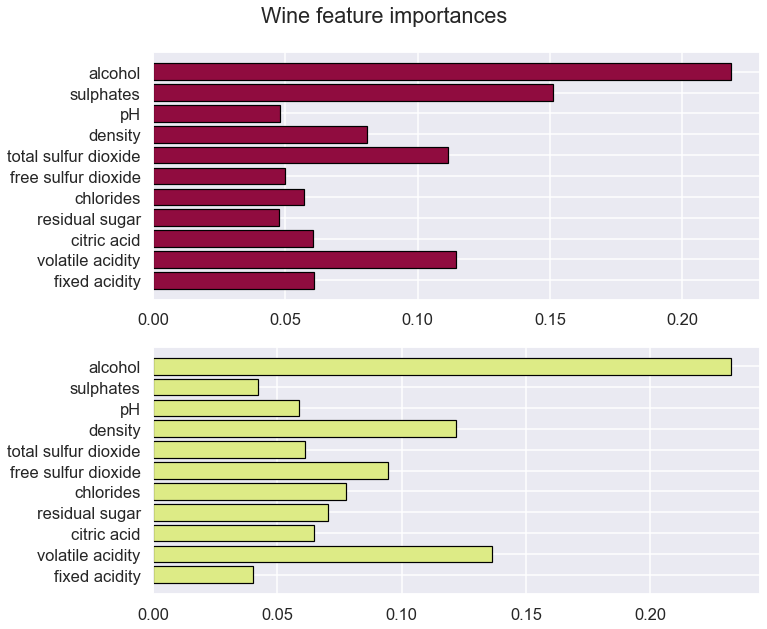

In [345]:
variable_importance(wine_red,wine_white,rf_classifier_red,rf_classifier_white)

In [346]:
from sklearn.metrics import confusion_matrix
pred_red = rf_classifier_red.predict(test_x_red)
confusion_matrix(test_y_red,pred_red)


array([[113,  36,   0],
       [ 42,  80,   7],
       [  3,  21,  18]], dtype=int64)

In [347]:
# Red wine Decision Tree classifier

decision_tree_red = tree.DecisionTreeClassifier(criterion = 'gini',max_depth=8)
decision_tree_red.fit(train_x_red, train_y_red)

# White wine Decision Tree classifier

decision_tree_white = tree.DecisionTreeClassifier(criterion = 'gini',max_depth=8)
decision_tree_white.fit(train_x_white, train_y_white)

print(f"Decision Tree score:\nRed wine: {decision_tree_red.score(test_x_red, test_y_red)}\nWhite wine: {decision_tree_white.score(test_x_white, test_y_white)}")
print(f"Decision Tree score:\nRed wine: {decision_tree_red.score(train_x_red, train_y_red)}\nWhite wine: {decision_tree_white.score(train_x_white, train_y_white)}")

Decision Tree score:
Red wine: 0.6375
White wine: 0.5877551020408164
Decision Tree score:
Red wine: 0.8491008600469117
White wine: 0.6934660541092394


In [348]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.neighbors import BallTree
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3

# Red wine KNN classifier

knn_red = KNeighborsClassifier(n_neighbors, weights='uniform',algorithm='brute',p=1)
##------------- Normalization pipeline ---------
knn_pipeline_red = make_pipeline(MinMaxScaler(), knn_red)
knn_pipeline_red.fit(train_x_red, train_y_red)
knn_pipeline_red.score(test_x_red,test_y_red)

# Red wine KNN classifier

knn_white = KNeighborsClassifier(n_neighbors, weights='uniform',algorithm='auto',p=1)
##------------- Normalization pipeline ---------
knn_pipeline_white = make_pipeline(MinMaxScaler(), knn_white)
knn_pipeline_white.fit(train_x_white, train_y_white)
knn_pipeline_white.score(test_x_white,test_y_white)

print(f"KNN pipeline with normalization score:\nRed wine: {knn_pipeline_red.score(test_x_red,test_y_red)}\nWhite wine: {knn_pipeline_white.score(test_x_white,test_y_white)}")
print(f"KNN pipeline with normalization score:\nRed wine: {knn_pipeline_red.score(train_x_red, train_y_red)}\nWhite wine: {knn_pipeline_white.score(train_x_white, train_y_white)}")

KNN pipeline with normalization score:
Red wine: 0.60625
White wine: 0.639795918367347
KNN pipeline with normalization score:
Red wine: 0.8092259577795152
White wine: 0.8098519652884124


In [349]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier


gnb_red = GaussianNB()
gnb_red.fit(train_x_red,train_y_red)
print(gnb_red.score(test_x_red,test_y_red),gnb_red.score(train_x_red,train_y_red))

gnb_white = GaussianNB()
gnb_white.fit(train_x_white,train_y_white)
print(gnb_white.score(test_x_white,test_y_white),gnb_white.score(train_x_white,train_y_white))

#

brn_red = BernoulliNB()
brn_red.fit(train_x_red,train_y_red)
print(brn_red.score(test_x_red,test_y_red),brn_red.score(train_x_red,train_y_red))

brn_white = BernoulliNB()
brn_white.fit(train_x_white,train_y_white)
print(brn_white.score(test_x_white,test_y_white),brn_white.score(train_x_white,train_y_white))

#

sgd_red = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd_red.fit(train_x_red,train_y_red)
print(sgd_red.score(test_x_red,test_y_red),sgd_red.score(train_x_red,train_y_red))

sgd_white = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd_white.fit(train_x_white,train_y_white)
print(sgd_white.score(test_x_white,test_y_white),sgd_white.score(train_x_white,train_y_white))



0.575 0.617670054730258
0.4969387755102041 0.5012761613067892
0.615625 0.6012509773260359
0.4448979591836735 0.4504849412965799
0.590625 0.6043784206411259
0.38571428571428573 0.38667687595712097


In [350]:
from xgboost import XGBClassifier
for lr in [0.001,0.01,0.1,0.3]:
    xgb_red = XGBClassifier(learning_rate=lr,objective='reg:logistic',use_label_encoder=False)
    xgb_red.fit(train_x_red, train_y_red)
    
    print(f"{lr} - {xgb_red.score(test_x_red,test_y_red)}")
    print(f"{lr} - {xgb_red.score(train_x_red, train_y_red)}")

[23:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.001 - 0.625
0.001 - 0.8139171227521501
[23:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.01 - 0.64375
0.01 - 0.8514464425332291
[23:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the

In [351]:
xgb_red = XGBClassifier(learning_rate=0.1)
xgb_red.fit(train_x_red, train_y_red)

[23:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Grześko\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [352]:
for lr in [0.001,0.01,0.1,0.3]:
    xgb_white = XGBClassifier(learning_rate=lr,objective='reg:logistic',use_label_encoder=False)
    xgb_white.fit(train_x_white, train_y_white)
    print(f"{lr} - {xgb_white.score(test_x_white,test_y_white)}")
    print(f"{lr} - {xgb_white.score(train_x_white, train_y_white)}")

[23:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.001 - 0.5979591836734693
0.001 - 0.6883614088820827
[23:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.01 - 0.6377551020408163
0.01 - 0.734558448187851
[23:17:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if yo

In [353]:
xgb_white = XGBClassifier(learning_rate=0.1)
xgb_white.fit(train_x_white, train_y_white)

[23:17:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Grześko\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Ridge Classifier

In [354]:
from sklearn.linear_model import RidgeClassifier

rdg_classifier_red = RidgeClassifier()
rdg_classifier_red.fit(train_x_red,train_y_red)
print(rdg_classifier_red.score(test_x_red,test_y_red),rdg_classifier_red.score(train_x_red,train_y_red))

rdg_classifier_white = RidgeClassifier()
rdg_classifier_white.fit(train_x_white,train_y_white)
print(rdg_classifier_white.score(test_x_white,test_y_white),rdg_classifier_white.score(train_x_white,train_y_white))

0.60625 0.6137607505863957
0.5785714285714286 0.5676365492598264


## SVM

In [355]:
from sklearn.svm import LinearSVC

svc_cls_red = LinearSVC(max_iter=10000)
svc_cls_red.fit(train_x_red,train_y_red)
print(svc_cls_red.score(test_x_red,test_y_red),svc_cls_red.score(train_x_red,train_y_red))

svc_cls_white = LinearSVC(max_iter=10000)
svc_cls_white.fit(train_x_white,train_y_white)
print(svc_cls_white.score(test_x_white,test_y_white),svc_cls_white.score(train_x_white,train_y_white))

0.628125 0.6278342455043002
0.5459183673469388 0.5278203164880041
C:\Users\Grześko\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [356]:
from sklearn.neighbors import KNeighborsClassifier

knc_red = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="ball_tree",leaf_size=100)
knc_red.fit(train_x_red,train_y_red)
print(knc_red.score(test_x_red,test_y_red),knc_red.score(test_x_red,test_y_red))

knc_white = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="ball_tree",leaf_size=100)
knc_white.fit(train_x_white,train_y_white)
print(knc_white.score(test_x_white,test_y_white),knc_white.score(test_x_white,test_y_white))

0.634375 0.634375
0.6326530612244898 0.6326530612244898


In [357]:
from sklearn.metrics import classification_report

y_pred1 = knc_red.predict(test_x_red)

print(classification_report(test_y_red, y_pred1))


              precision    recall  f1-score   support

           0       0.72      0.67      0.69       149
           1       0.57      0.60      0.58       129
           2       0.58      0.60      0.59        42

    accuracy                           0.63       320
   macro avg       0.62      0.62      0.62       320
weighted avg       0.64      0.63      0.64       320



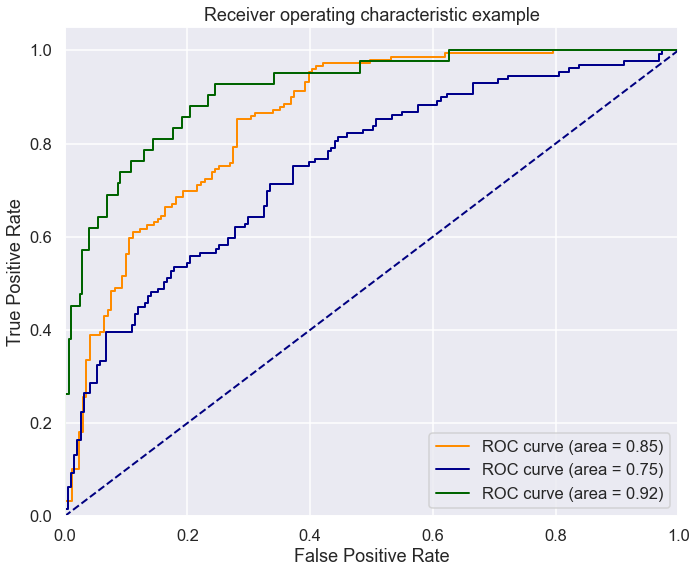

In [358]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y = wine_red["quality"]
n_classes = 3

y_test = np.array(pd.get_dummies(test_y_red))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_red[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
for x,c in zip(range(0,3),["darkorange","darkblue","darkgreen"]):
    plt.plot(fpr[x], tpr[x], color=c,
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[x])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [359]:
rows_df = ["Random Forest","Decision tree","KNN","KNN with Scaler","Ridge Classifier","SVC","Gaussian NB","Bernoulli NB","SGD Classifier","XGBoost"]
columns = ["Training set","Testing set"]

magic_dict_1={
    "Training set":[rf_classifier_white.score(train_x_white,train_y_white),decision_tree_white.score(train_x_white,train_y_white),knn_white.score(train_x_white,train_y_white),knn_pipeline_white.score(train_x_white,train_y_white),rdg_classifier_white.score(train_x_white,train_y_white),svc_cls_white.score(train_x_white,train_y_white),gnb_white.score(train_x_white,train_y_white),brn_white.score(train_x_white,train_y_white),sgd_white.score(train_x_white,train_y_white),xgb_white.score(train_x_white,train_y_white)],
    "Testing set":[rf_classifier_white.score(test_x_white,test_y_white),decision_tree_white.score(test_x_white,test_y_white),knn_white.score(test_x_white,test_y_white),knn_pipeline_white.score(test_x_white,test_y_white),rdg_classifier_white.score(test_x_white,test_y_white),svc_cls_white.score(test_x_white,test_y_white),gnb_white.score(test_x_white,test_y_white),brn_white.score(test_x_white,test_y_white),sgd_white.score(test_x_white,test_y_white),xgb_white.score(test_x_white,test_y_white)]
}

magic_dict_2={
    "Training set":[rf_classifier_red.score(train_x_red,train_y_red),decision_tree_red.score(train_x_red,train_y_red),knn_red.score(train_x_red,train_y_red),knn_pipeline_red.score(train_x_red,train_y_red),rdg_classifier_red.score(train_x_red,train_y_red),svc_cls_red.score(train_x_red,train_y_red),gnb_red.score(train_x_red,train_y_red),brn_red.score(train_x_red,train_y_red),sgd_red.score(train_x_red,train_y_red),xgb_red.score(train_x_red,train_y_red)],
    "Testing set":[rf_classifier_red.score(test_x_red,test_y_red),decision_tree_red.score(test_x_red,test_y_red),knn_red.score(test_x_red,test_y_red),knn_pipeline_red.score(test_x_red,test_y_red),rdg_classifier_red.score(test_x_red,test_y_red),svc_cls_red.score(test_x_red,test_y_red),gnb_red.score(test_x_red,test_y_red),brn_red.score(test_x_red,test_y_red),sgd_red.score(test_x_red,test_y_red),xgb_red.score(test_x_red,test_y_red)]
}

In [360]:
df_red = pd.DataFrame(data=magic_dict_2,columns=columns)
df_red.index = ["Random Forest","Decision tree","KNN","KNN with Scaler","Ridge Classifier","SVC","Gaussian NB","Bernoulli NB","SGD Classifier","XGBoost LR - 0.1"]
df_white = pd.DataFrame(data=magic_dict_1,columns=columns)
df_white.index = ["Random Forest","Decision tree","KNN","KNN with Scaler","Ridge Classifier","SVC","Gaussian NB","Bernoulli NB","SGD Classifier","XGBoost LR - 0.1"]

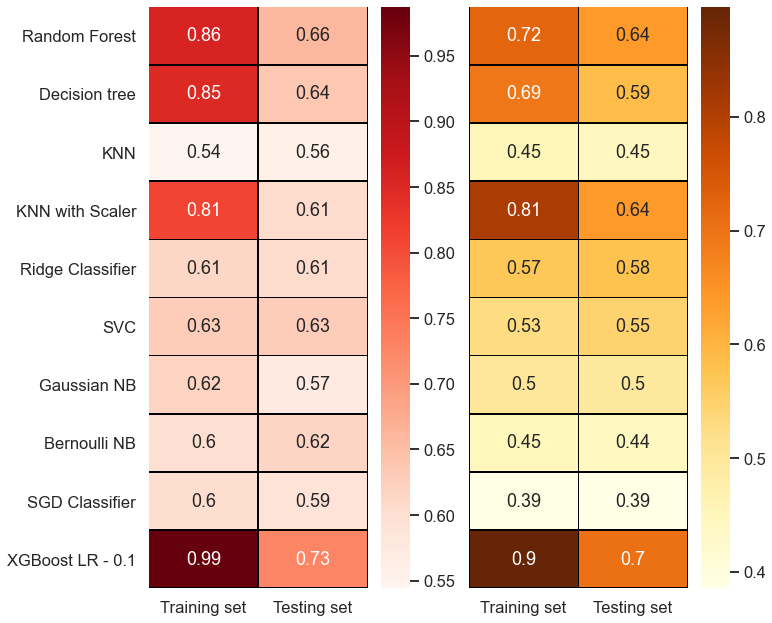

In [377]:
sns.set_context("talk")
sns.color_palette("dark")

f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
g1 = sns.heatmap(df_red, annot=True,linewidths=.5,cmap="Reds",cbar=True,ax=ax1,linecolor="black")
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(df_white, annot=True,linewidths=.5,cmap="YlOrBr",cbar=True,ax=ax2,linecolor="black")
g2.set_ylabel('')
g2.set_xlabel('')
f.tight_layout()